
# Побудова моделі KNeighbors

1. **Регресія**: Прогнозування віку малюска (кількість кілець).
2. **Класифікація**: Прогнозування статі малюска (M, F, I).

---

## Опис датасету
- **Джерело**: [UCI Abalone Dataset](https://archive.ics.uci.edu/ml/datasets/Abalone)
- **Атрибути**:
  - `Sex`: Категоріальна змінна (M = Чоловік, F = Жінка, I = Інфант).
  - `Length`, `Diameter`, `Height`: Фізичні виміри (числові значення).
  - `WholeWeight`, `ShuckedWeight`, `VisceraWeight`, `ShellWeight`: Вагові характеристики (числові значення).
  - `Rings`: Ціла змінна (ціль для регресії, що представляє вік).

---


In [1]:

# Імпортуємо необхідні бібліотеки
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Завантаження датасету
column_names = [
    "Sex", "Length", "Diameter", "Height", "WholeWeight",
    "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"
]
abalone_df = pd.read_csv('abalone/abalone.data', header=None, names=column_names)

# Попередній перегляд датасету
abalone_df.head()


Matplotlib created a temporary cache directory at /var/folders/t1/w5ktxn5j25n31cysspss6y880000gn/T/matplotlib-0940z7__ because the default path (/Users/raymond/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Метрична модель регресії для прогнозування віку молюсків

In [2]:

# Регресія: Прогнозування віку (кількість кілець)
# Підготовка даних
X_regression = abalone_df.drop(columns=["Rings", "Sex"])
y_regression = abalone_df["Rings"]

# Розділення даних на навчальну та тестову вибірки
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Тренування моделі K-найближчих сусідів
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train_reg, y_train_reg)

# Прогнозування на тестових даних
y_pred_reg = regressor.predict(X_test_reg)

# Оцінка регресійної моделі
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Середньоквадратична помилка (MSE): {mse}")


Середньоквадратична помилка (MSE): 5.268803827751197


## Метрична модель класифікації для прогнозування статі молюсків

              precision    recall  f1-score   support

           0       0.47      0.56      0.51       307
           1       0.44      0.33      0.38       262
           2       0.71      0.73      0.72       267

    accuracy                           0.54       836
   macro avg       0.54      0.54      0.53       836
weighted avg       0.54      0.54      0.53       836



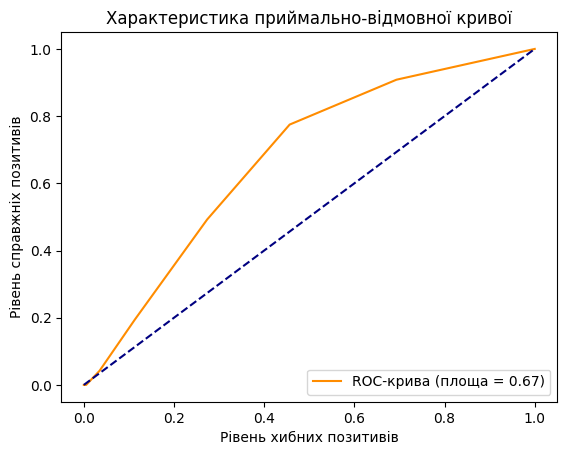

In [3]:

# Класифікація: Прогнозування статі
# Підготовка даних
X_classification = abalone_df.drop(columns=["Sex", "Rings"])
y_classification = abalone_df["Sex"]

# Перетворення цільової змінної у числовий формат
y_classification = y_classification.map({'M': 0, 'F': 1, 'I': 2})

# Розділення даних на навчальну та тестову вибірки
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Тренування моделі K-найближчих сусідів
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train_cls, y_train_cls)

# Прогнозування на тестових даних
y_pred_cls = classifier.predict(X_test_cls)

# Оцінка класифікаційної моделі
print(classification_report(y_test_cls, y_pred_cls))

# Побудова ROC-кривої (для одного класу)
y_score = classifier.predict_proba(X_test_cls)
fpr, tpr, _ = roc_curve(y_test_cls, y_score[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Побудова графіка ROC-кривої
plt.figure()
plt.plot(fpr, tpr, color="darkorange", label=f"ROC-крива (площа = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("Рівень хибних позитивів")
plt.ylabel("Рівень справжніх позитивів")
plt.title("Характеристика приймально-відмовної кривої")
plt.legend(loc="lower right")
plt.show()


При n_neighbors = 6 AUC має найбільше значення. При AUC = 0.6–0.7: Модель має слабку прогностичну здатність.

## Перевірка чи є дисбаланс

In [4]:
# Підрахунок кількості екземплярів у кожному класі стовпця 'Sex'
sex_distribution = abalone_df['Sex'].value_counts()

# Виведення результату
print("Розподіл класів у стовпці 'Sex':")
print(sex_distribution)


Розподіл класів у стовпці 'Sex':
Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64


Висновок. Баланс є.